<a href="https://colab.research.google.com/github/ShubhamJadhav03/DeepLearning/blob/main/CNN_IMG_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

MultDim Array --> 1Dim Array

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

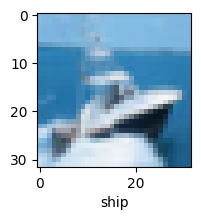

In [ ]:
plot_sample(X_train, y_train, 8)

Normalise Data

In [ ]:
X_train = X_train/255
X_test = X_test/255

Convolution Neural Network to train images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3818 - loss: 1.6947
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6005 - loss: 1.1480
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6550 - loss: 1.0013
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6895 - loss: 0.9010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7110 - loss: 0.8334
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7322 - loss: 0.7804
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7467 - loss: 0.7254
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7629 - loss: 0.6838
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7814 - loss: 0.6312
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7905 - loss: 0.6047


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7128 - loss: 0.8814


[0.8849337100982666, 0.7128000259399414]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[8.7772307e-05, 1.1373149e-04, 7.7227224e-04, 7.8977948e-01,
        2.1511797e-04, 1.8727474e-01, 1.5042072e-02, 1.2608198e-04,
        6.2286141e-03, 3.6016238e-04],
       [4.1726022e-03, 6.8094946e-02, 1.4800389e-05, 1.0037803e-07,
        7.3248754e-07, 2.2085841e-10, 2.6494482e-09, 7.8840339e-09,
        9.2762792e-01, 8.8913781e-05],
       [7.9044960e-02, 2.1088466e-01, 2.4365042e-03, 1.7797599e-02,
        1.0665841e-03, 3.6809273e-04, 5.5893615e-05, 7.1150140e-04,
        6.3753188e-01, 5.0102297e-02],
       [9.5786631e-01, 8.0770766e-03, 1.1391852e-02, 4.1682040e-04,
        2.8588546e-03, 6.4930260e-05, 4.9502682e-04, 1.8620758e-05,
        1.7212726e-02, 1.5978016e-03],
       [4.6532905e-06, 8.1173712e-06, 1.3562865e-02, 2.7888251e-02,
        5.8392096e-01, 8.3092833e-03, 3.6627457e-01, 2.6044967e-05,
        3.7766815e-06, 1.5310688e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(elemenmt) for elemenmt in y_pred]
y_classes[4:10]

[4, 6, 1, 6, 3, 1]

In [ ]:
y_test[4:10]

array([6, 6, 1, 6, 3, 1], dtype=uint8)

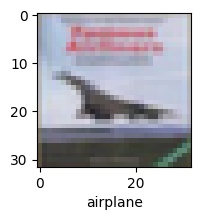

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

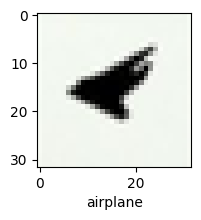

In [ ]:
plot_sample(X_test, y_test,21)

In [ ]:
classes[y_classes[21]]

'airplane'